# i. Objective

Predicting airplane ticket prices based on the available dataset by comparing the results from various regression models.


# ii. Import Libraries

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import joblib
import json
import pickle

import warnings
warnings.filterwarnings('ignore')


# Untuk membuat model
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Untuk evaluasi model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# iii. Data Loading

In [4]:
# Import data yang akan digunakan

data_ori = pd.read_csv('Clean_Dataset.csv')

In [5]:
# Duplicate original data

data = data_ori.copy()

In [6]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


We can see that the dataset consists of 12 columns, with 4 columns being of numerical type and 8 columns being categorical.

The 'Unnamed: 0' column contains the same values as the index, so it can be dropped.

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# iv. Exploratory Data Analysis (EDA)

## Airline

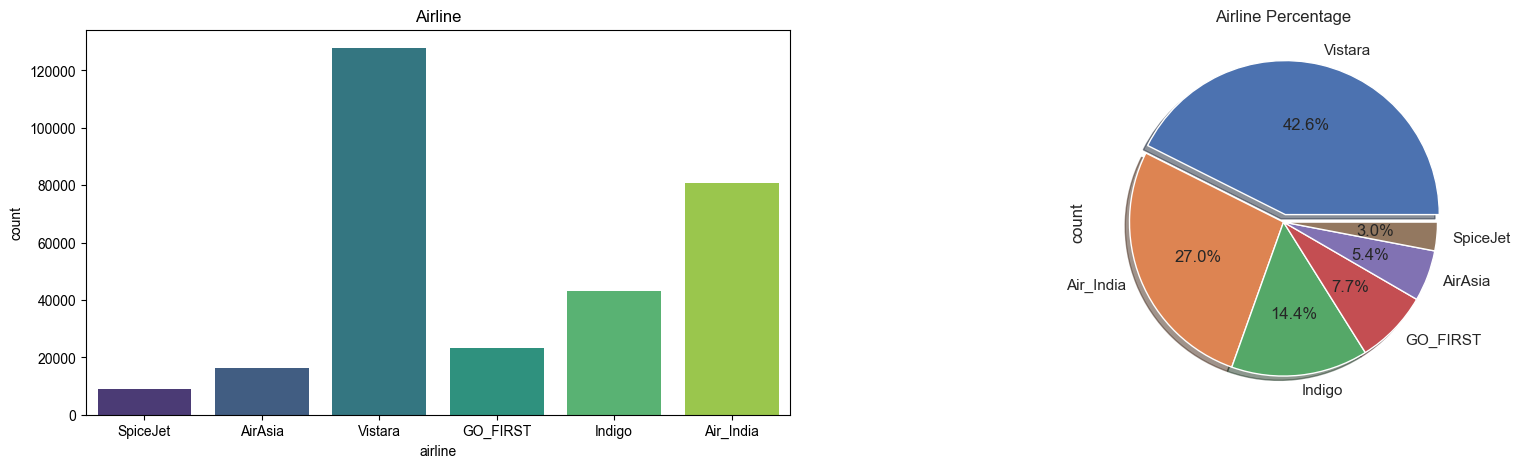

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='airline', data=data, palette='viridis')
sns.set_theme(style="whitegrid")
plt.title('Airline')


plt.subplot(1, 2, 2)
data['airline'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0 ,0 ,0], autopct='%1.1f%%', shadow=True)
plt.title('Airline Percentage')

plt.show()

The visualization above shows that the data involves 6 airline companies, with Vistara being the most frequently used airline, accounting for 42.6% of the entire dataset. On the other hand, SpiceJet is the least utilized airline, representing 3% of the data.

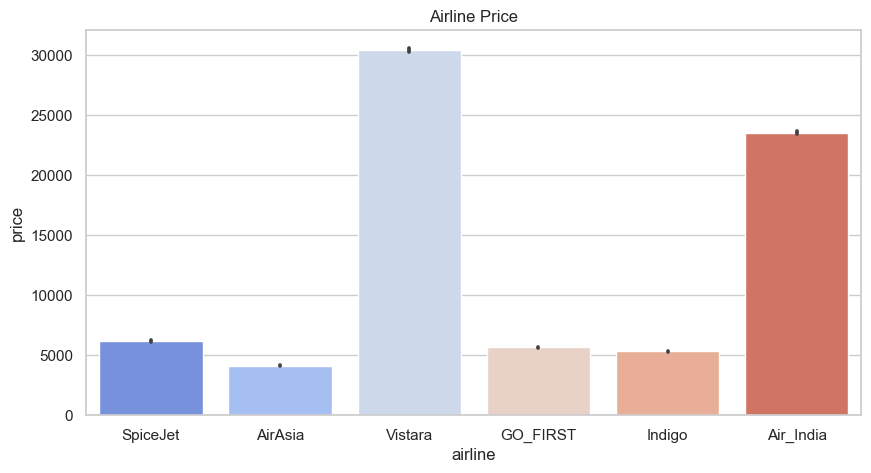

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price',data=data, palette='coolwarm')
plt.title('Airline Price')
plt.show()

Vistara airline sets the highest average prices compared to other airlines; nevertheless, Vistara remains the most preferred airline in India.

## Source and Destination City

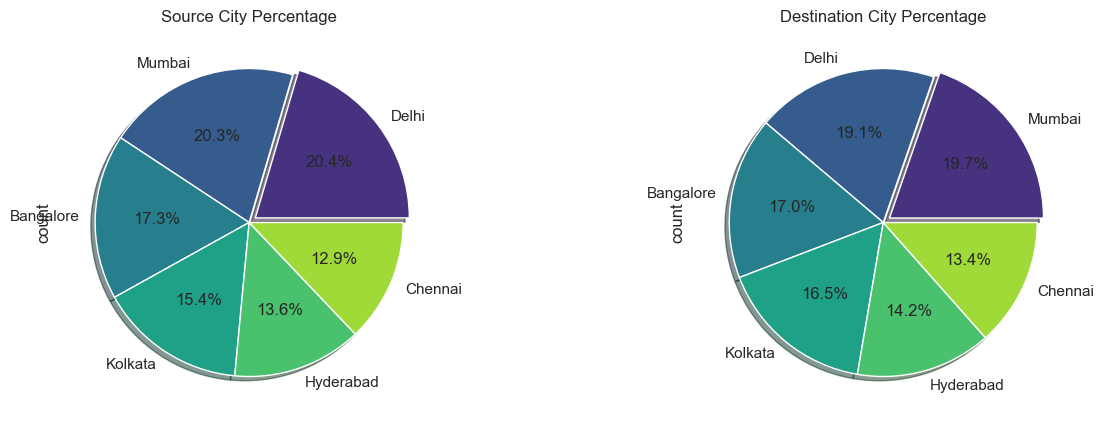

In [12]:
colors = sns.color_palette("viridis", 6)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['source_city'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0 ,0 ,0], autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Source City Percentage')

plt.subplot(1, 2, 2)
data['destination_city'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0 ,0 ,0], autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Destination City Percentage')

plt.show()

From the chart above, it is evident that there are 6 common departure and destination cities: Delhi, Mumbai, Bangalore, Chennai, Kolkata, and Hyderabad. Many consumers depart from Delhi, likely because Delhi is the capital of India.

## Departure and Arrival Time

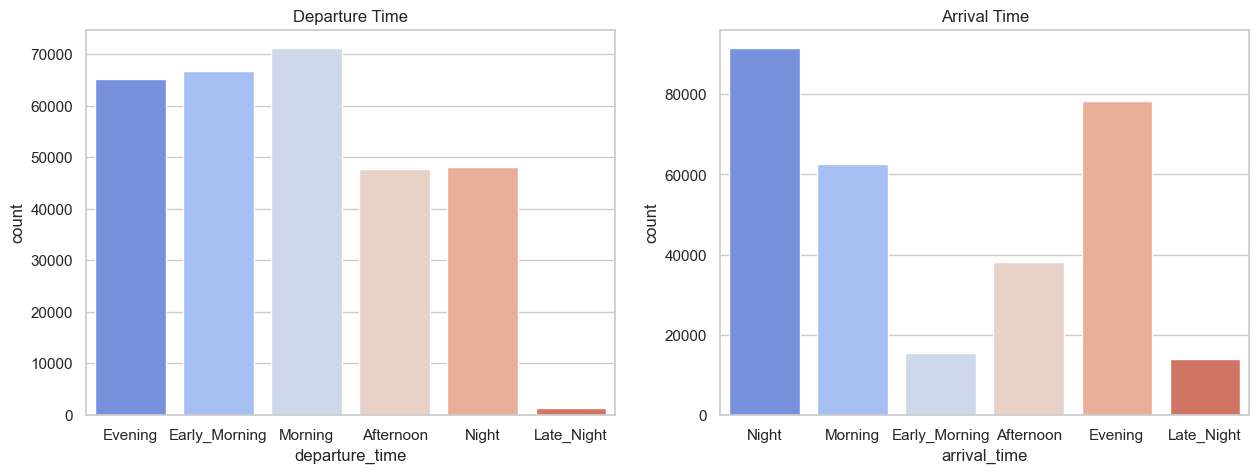

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='departure_time', data=data, palette='coolwarm')
sns.set_theme(style="whitegrid")
plt.title('Departure Time')

plt.subplot(1, 2, 2)
sns.countplot(x='arrival_time', data=data, palette='coolwarm')
sns.set_theme(style="whitegrid")
plt.title('Arrival Time')

plt.show()

Many consumers travel in the morning for departures, and a significant number of flight arrivals by various airlines in India occur in the evening.

## Stops

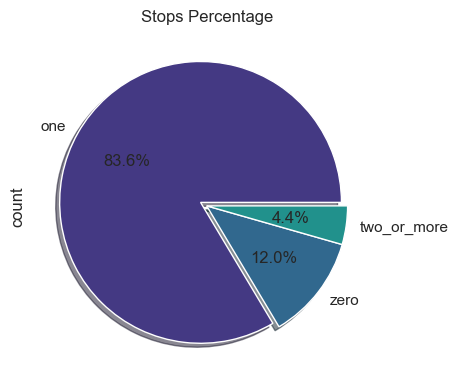

In [14]:
colors = sns.color_palette("viridis", 5)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data['stops'].value_counts().plot(kind='pie', explode=[0.05, 0, 0], autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Stops Percentage')
plt.show()

Transits by many flights in India are done once, accounting for 83.6% of the entire dataset, while direct flights make up 12%.

## Class

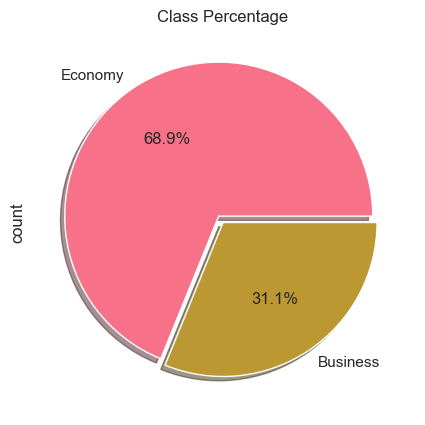

In [15]:
colors = sns.color_palette("husl", 6)

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
data['class'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Class Percentage')
plt.show()

It turns out that airlines offer two classes, namely economy and business, with 68.9% of people choosing economy and the remaining 31.1% opting for business class.

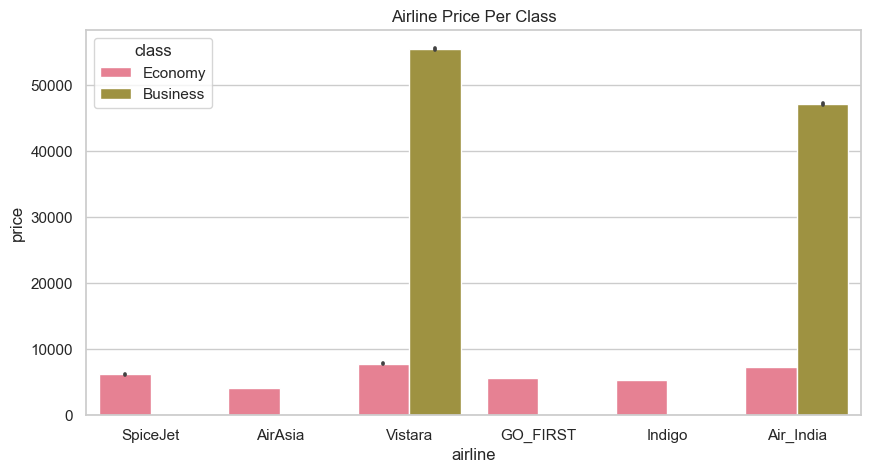

In [16]:
colors = sns.color_palette("husl", 5)

plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price', hue='class' ,data=data, palette=colors)
plt.title('Airline Price Per Class')
plt.show()

The chart above indicates that only two airlines, Vistara and Air India, offer a business class, while the other four do not have a business class. It is likely that the presence of a business class in Vistara contributes to its higher average prices. However, the availability of a business class could also be a factor attracting many people to choose Vistara.

## Duration

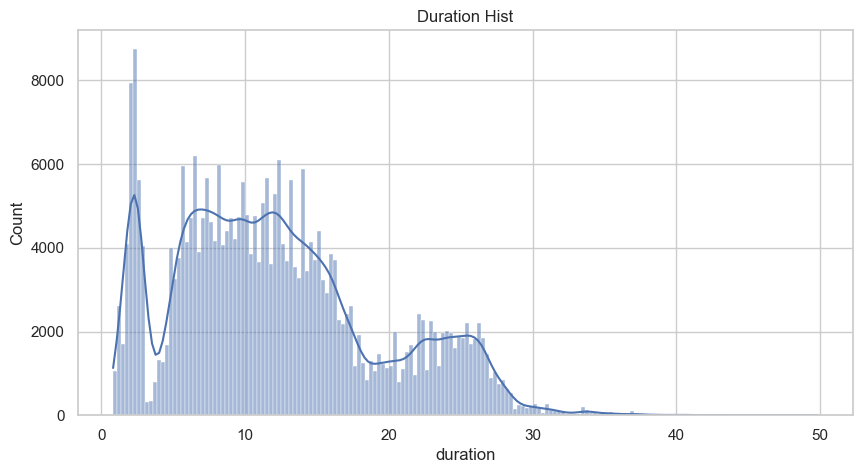

12.221020812718846

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'duration', data = data, kde = True)
plt.title('Duration Hist')
plt.show()
data.duration.mean()

In [18]:
data.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

As seen in the above visualization, there is a diverse range of flight durations, with an average flight time of 12 hours. Although the flights are within cities, many durations exceed 5 hours due to the inclusion of transit times.

## Days Left

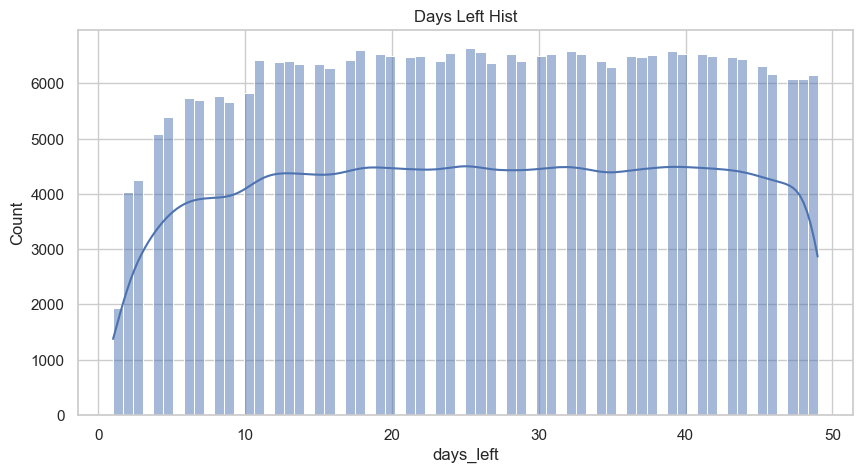

26.004750910369044

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'days_left', data = data, kde = True)
plt.title('Days Left Hist')
plt.show()
data.days_left.mean()

In [20]:
data.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

Days Left represents the time interval between ticket booking and departure, with consumers, on average, booking 26 days prior to departure.

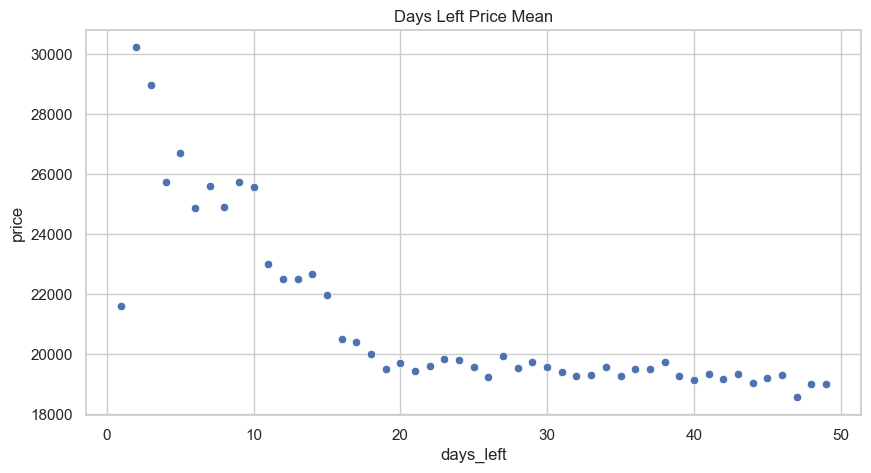

In [21]:
dl = data.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(x='days_left', y='price', data = dl)
plt.title('Days Left Price Mean')
plt.show()

The scatterplot above illustrates the influence of the booking period on ticket prices. It can be observed that ticket prices remain relatively lower when consumers book 20-50 days before departure. However, prices tend to surge significantly when booked within 20 days, and interestingly, they drop again one day before departure, possibly due to last-minute discounts to fill remaining seats.

## Price (Target)

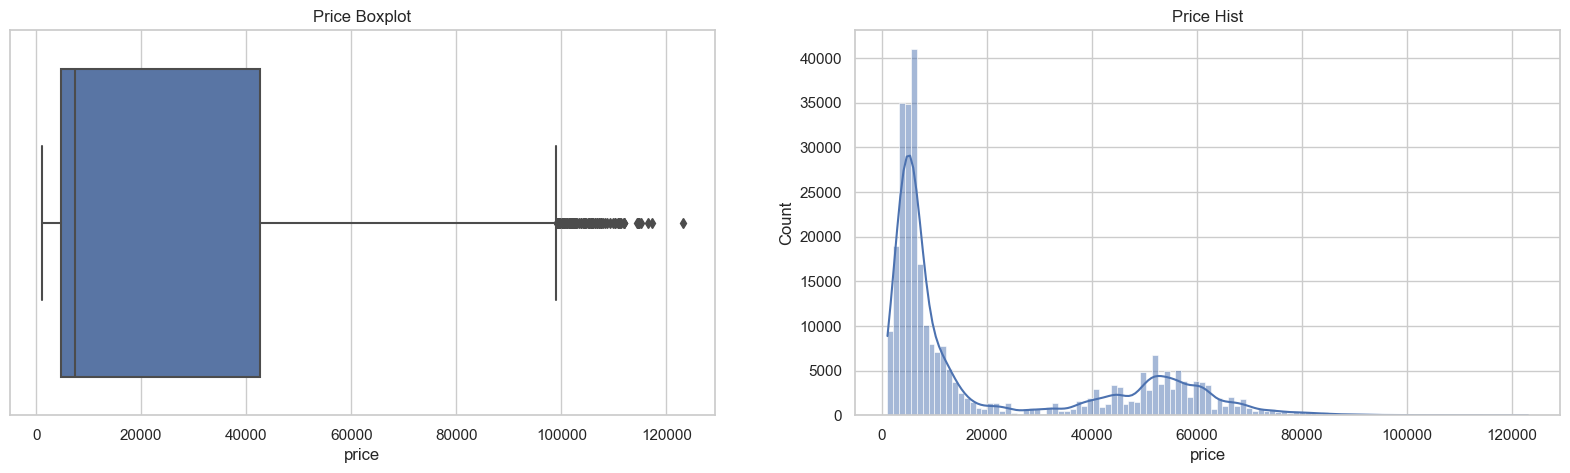

In [22]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)
plt.title('Price Boxplot')

plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)
plt.title('Price Hist')

plt.show()

In [23]:
data.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

The distribution of airplane ticket prices in the dataset reveals that the lowest price is 1105 rupees, the highest price is 123071 rupees, and the average price is 20890 rupees.

# Data Preprocessing

## Get Data Inference

In [24]:
data_inf = data.sample(25, random_state=7)
data_inf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
37442,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16,14293
26706,Vistara,UK-951,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38,6821
172802,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20,9079
240001,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29,58125
82508,Air_India,AI-809,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38,5152
173133,Indigo,6E-913,Hyderabad,Morning,one,Night,Kolkata,Economy,8.75,23,5750
46270,Indigo,6E-2047,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.25,19,2339
2118,Indigo,6E-6278,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,13,5955
282824,Air_India,AI-543,Hyderabad,Morning,one,Night,Bangalore,Business,10.33,46,56590
40422,GO_FIRST,G8-423,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.83,34,3475


In [25]:
# Menghapus inference set dari dataset awal

data = data.drop(data_inf.index)
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [26]:
# Reset index pada data Inference

data_inf.reset_index(drop=True, inplace=True)
data_inf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16,14293
1,Vistara,UK-951,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38,6821
2,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20,9079
3,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29,58125
4,Air_India,AI-809,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38,5152
5,Indigo,6E-913,Hyderabad,Morning,one,Night,Kolkata,Economy,8.75,23,5750
6,Indigo,6E-2047,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.25,19,2339
7,Indigo,6E-6278,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,13,5955
8,Air_India,AI-543,Hyderabad,Morning,one,Night,Bangalore,Business,10.33,46,56590
9,GO_FIRST,G8-423,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.83,34,3475


## Split Between Train and Test

In [27]:
# Splitting between `X` (Features) and `y` (Targets)

X = data.drop('price', axis=1)
y = data['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Size : ", X_train.shape)
print("Test Size : ", X_test.shape)

Train Size :  (240102, 10)
Test Size :  (60026, 10)


## Handling Missing Values

Checking for missing values in the Train and Test Sets.

### Train Set

In [29]:
X_train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [30]:
y_train.isnull().sum()

0

There are no missing values in the train set.

### Test Set

In [31]:
X_test.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [32]:
y_test.isnull().sum()

0

The test set also does not have any missing values in any of its columns.

## Handling Outliers

Checking the data distribution to determine the method for handling outliers.

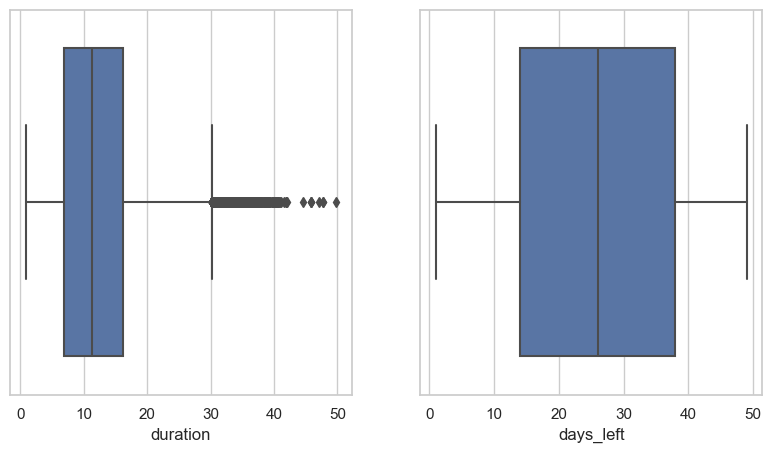

In [33]:
plt.figure(figsize=(15, 5))
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
for i in X_train[num_cols]:
    plt.subplot(1, 3, X_train[num_cols].columns.get_loc(i) + 1)
    sns.boxplot(x=i, data=X_train[num_cols])
plt.show()

In [34]:
X_train['duration'].skew()

0.6024758517836868

The 'duration' column has some outliers, and its distribution is skewed. Therefore, we will check the number of outliers using the Interquartile Range (IQR) method.


In [35]:
def find_skewed_boundaries(df, variable, distance): # untuk distribusi skewed
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [36]:
# Mengecek jumlah outliers capital_gain

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'duration', 1.5)

print('Jumlah Data Train: {}'.format(len(X_train)))
print('Jumlah data di luar upper boundary : {}'.format(len(X_train[X_train['duration'] > upper_boundary])))
print('Jumlah data di luar lower boundary : {}'.format(len(X_train[X_train['duration'] < lower_boundary])))
print('')
print('% upper boundary outliers : {}'.format(len(X_train[X_train['duration'] > upper_boundary]) / len(X_train) * 100))
print('% lower boundary outliers  : {}'.format(len(X_train[X_train['duration'] < lower_boundary]) / len(X_train) * 100))

Jumlah Data Train: 240102
Jumlah data di luar upper boundary : 1679
Jumlah data di luar lower boundary : 0

% upper boundary outliers : 0.6992861367252251
% lower boundary outliers  : 0.0


The number of outliers is very small, so they will be left as is, as these data points are also important and can influence the pricing.

## Feature Selection

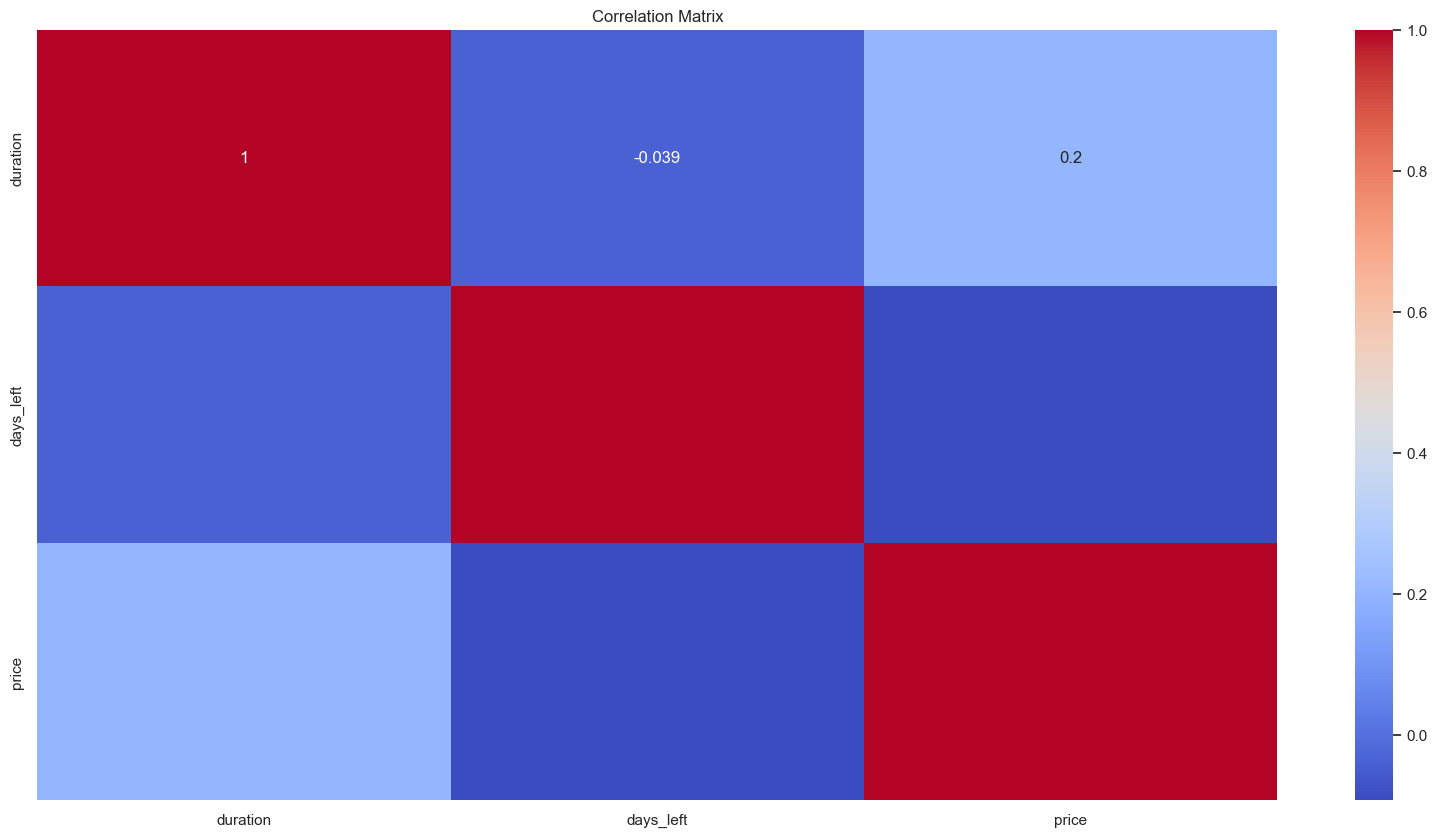

In [37]:
# One-hot encode the categorical columns
encoded_data = pd.get_dummies(data[['airline','stops', 'source_city', 'class', 'destination_city', 'departure_time', 'arrival_time']])

# Concatenate the original dataframe with the one-hot encoded columns
combined_data = pd.concat([data, encoded_data], axis=1)

# Drop the original categorical columns and any other non-numeric columns
columns_to_drop = ['airline','stops', 'source_city', 'class', 'destination_city', 'departure_time', 'arrival_time']
combined_data.drop(columns=columns_to_drop, inplace=True)

# Further drop any other non-numeric columns
non_numeric_cols = combined_data.select_dtypes(exclude=[np.number]).columns
combined_data.drop(columns=non_numeric_cols, inplace=True)

# Compute the correlation matrix
corr1 = combined_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Based on the correlation results above and personal judgment, it is observed that all columns in this dataset influence the price except for 'flight'. Therefore, the 'flight' column will be dropped.

In [38]:
X_train.drop(columns=['flight'], inplace=True)
X_test.drop(columns=['flight'], inplace=True)

X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
22589,Air_India,Delhi,Morning,one,Afternoon,Kolkata,Economy,27.58,16
50767,SpiceJet,Mumbai,Evening,zero,Night,Delhi,Economy,2.42,40
164588,GO_FIRST,Hyderabad,Morning,one,Night,Mumbai,Economy,13.25,42
191441,Vistara,Chennai,Morning,one,Night,Mumbai,Economy,9.33,31
126250,Air_India,Kolkata,Afternoon,one,Evening,Delhi,Economy,29.17,42
...,...,...,...,...,...,...,...,...,...
235095,Air_India,Mumbai,Evening,one,Morning,Kolkata,Business,15.00,14
10744,AirAsia,Delhi,Morning,zero,Afternoon,Bangalore,Economy,2.83,6
49698,AirAsia,Mumbai,Afternoon,one,Late_Night,Delhi,Economy,12.25,35
189655,Vistara,Chennai,Evening,one,Afternoon,Mumbai,Economy,20.83,18


## Split Between Numerical and Categorical Column

In [39]:
# Mendapatkan list Numerical columns sesuai tiper persebarannya dan Categorical columns

num_cols_norm = ['days_left']
num_cols_skew = ['duration']
cat_cols_oht = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
cat_cols_ord = ['stops', 'class']

print('Normal Numerical Columns : ', num_cols_norm)
print('Skewed Numerical Columns : ', num_cols_skew)
print('Ordinal Categorical Columns : ', cat_cols_ord)
print('Categorical Columns : ', cat_cols_oht)

Normal Numerical Columns :  ['days_left']
Skewed Numerical Columns :  ['duration']
Ordinal Categorical Columns :  ['stops', 'class']
Categorical Columns :  ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']


## v. Feature Engineering

Separating Scaling and Encoding according to the distribution type and data type.

In [40]:
# Numeric Features Scaling
num_skew = Pipeline([('scaling', MinMaxScaler())])
num_norm = Pipeline([('scaling', StandardScaler())])
cat_ord = Pipeline([('encoding', OrdinalEncoder())])
cat_oht = Pipeline([('encoding', OneHotEncoder())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('norm_scale', num_norm, num_cols_norm),
    ('skew_scale', num_skew, num_cols_skew),
    ('ord_encode', cat_ord, cat_cols_ord),
    ('oht_encode', cat_oht, cat_cols_oht)
])

# vi. Model Definition

In [41]:
# SVM Pipeline
svm_pipe = Pipeline([('preprocessing', preprocess), ('svm', SVC(kernel='linear', C=1))])

#Decision Tree Pipeline
dt_pipe = Pipeline([('preprocessing', preprocess), ('dt', DecisionTreeClassifier(max_depth=10))])

# Random Forest Pipeline
rf_pipe = Pipeline([('preprocessing', preprocess), ('rf', RandomForestClassifier(n_estimators=50, max_depth=10))])

# Linear Regression Pipeline
log_pipe = Pipeline([('preprocessing', preprocess), ('log', LinearRegression())])


# KNN Pipeline
knn_pipe = Pipeline([('preprocessing', preprocess), ('knn', KNeighborsClassifier())])


# AdaBoost Pipeline
ada_pipe = Pipeline([('preprocessing', preprocess), ('ada', AdaBoostRegressor())])

Here, only 3 models will be used due to memory constraints and a very long time consumption.

# vii. Model Training

In [42]:
# Training model

%time log_pipe.fit(X_train, y_train)
%time knn_pipe.fit(X_train, y_train)
%time ada_pipe.fit(X_train, y_train)

CPU times: user 866 ms, sys: 114 ms, total: 980 ms
Wall time: 886 ms
CPU times: user 631 ms, sys: 84.9 ms, total: 716 ms
Wall time: 648 ms
CPU times: user 9.54 s, sys: 677 ms, total: 10.2 s
Wall time: 10.6 s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('skew_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('ord_encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['stops', 'class']),
                                                 ('oht_encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city'])])),
                ('ada', AdaBoostRegressor())])

# viii. Model Evaluation

## Cross-Val

Performing model evaluation using cross-validation scores to find the best model. Here, cross-validation is only conducted on one model due to memory constraints and very long time consumption.

In [42]:

scores_ada = cross_val_score(ada_pipe, X_train, y_train, cv=5, scoring='r2')

In [43]:

print('----AdaBoost----')
print(f'AdaBoost Mean : {scores_ada.mean()}')
print(f'AdaBoost Std : {scores_ada.std()}')

----AdaBoost----
AdaBoost Mean : 0.9333136456308603
AdaBoost Std : 0.001824797848248196


The cross-validation scores above show that the AdaBoost model achieves a high average R2 score of 0.93 with very low standard deviation. However, further verification will be done to check for overfitting on the train and test sets.

In [44]:
# Model Evaluation Using MAE and R2
print('AdaBoost Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, ada_pipe.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, ada_pipe.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, ada_pipe.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, ada_pipe.predict(X_test))}')

AdaBoost Model

Train-Set Mean Absolute Error (MAE):  4311.606544889889
Train-Set R2 Score: 0.9183900945155101

Test-Set Mean Absolute Error (MAE):  4356.133307152792
Test-Set R2 Score: 0.9165095921031018


The baseline AdaBoost model is already considered a good fit and yields a decent score. Therefore, the AdaBoost model will be selected for hyperparameter tuning.

## Hyperparameter Tuning

Performing hyperparameter tuning using grid search.

In [45]:
param_ada = {'ada__n_estimators': [50, 100],
             'ada__learning_rate' : [0.1, 0.2]}

In [46]:
grid_ada = GridSearchCV(ada_pipe, param_grid=param_ada, cv=5, n_jobs=-1, return_train_score=True)

In [47]:
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('norm_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['days_left']),
                                                                        ('skew_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['duration']),
                                                                        ('ord_encode',
                                                                         Pipeline(steps=[('encoding',
                                                                                          OrdinalEncoder())]),
                                                                         ['stops',
                                                                          'class']),
                                                                        ('oht_encode',
                                                                         Pipeline(steps=[('encoding',
                                                                                          OneHotEncoder())]),
                                                                         ['airline',
                                                                          'source_city',
                                                                          'departure_time',
                                                                          'arrival_time',
                                                                          'destination_city'])])),
                                       ('ada', AdaBoostRegressor())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.1, 0.2],
                         'ada__n_estimators': [50, 100]},
             return_train_score=True)

In [48]:
grid_ada.best_params_

{'ada__learning_rate': 0.1, 'ada__n_estimators': 100}

The ADA Boost model achieves the highest score using the parameters learning_rate 0.1 and n_estimator 100.

In [49]:
# Model Evaluation Using MAE and R2
print('AdaBoost Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, grid_ada.best_estimator_.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, grid_ada.best_estimator_.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, grid_ada.best_estimator_.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, grid_ada.best_estimator_.predict(X_test))}')

AdaBoost Model

Train-Set Mean Absolute Error (MAE):  3547.5516303308755
Train-Set R2 Score: 0.9362562961831183

Test-Set Mean Absolute Error (MAE):  3576.4216502404756
Test-Set R2 Score: 0.9351189562811085


After tuning, the AdaBoost model achieves better MAE and R2 Score values compared to the baseline model. On the training set, it attains an MAE of 3547 and an R2 score of 0.936, while on the test set, it obtains an MAE of 3576 and an R2 score of 0.935, indicating a good fit as the difference in values is not too significant.

# x. Model Inference

In [50]:
# Display inference set
data_inf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16,14293
1,Vistara,UK-951,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38,6821
2,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20,9079
3,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29,58125
4,Air_India,AI-809,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38,5152


In [51]:
data_inf.drop(columns=['flight', 'price'])

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Vistara,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16
1,Vistara,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38
2,Vistara,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20
3,Vistara,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29
4,Air_India,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38
5,Indigo,Hyderabad,Morning,one,Night,Kolkata,Economy,8.75,23
6,Indigo,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.25,19
7,Indigo,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,13
8,Air_India,Hyderabad,Morning,one,Night,Bangalore,Business,10.33,46
9,GO_FIRST,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.83,34


In [52]:
# melakukan predict pada inference set
y_pred_inf = grid_ada.best_estimator_.predict(data_inf)

In [53]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price_Pred'])

In [54]:
pred_inf = pd.concat([data_inf['price'], y_pred_inf_df], axis=1)
pred_inf

,price,Price_Pred
0,14293,5784.944610
1,6821,5659.428260
2,9079,5659.428260
3,58125,59153.576702
4,5152,5602.527247
5,5750,5602.527247
6,2339,3222.331155
7,5955,9515.838580
8,56590,49473.289006
9,3475,5602.527247


In [55]:
# Model Evaluation Using MAE and R2
print('AdaBoost Model')
print('')
print('Inference-Set Mean Absolute Error (MAE): ', mean_absolute_error(data_inf['price'], y_pred_inf))
print(f'Inference-Set R2 Score: {r2_score(data_inf.price, y_pred_inf)}')

AdaBoost Model

Inference-Set Mean Absolute Error (MAE):  3028.3942229157374
Inference-Set R2 Score: 0.9560016056465318


The tuned AdaBoost model yields a quite good score on the Inference set, obtaining an MAE of 3028 and an R2 score of 0.95.

# Conclusion

This dataset contains information about the details of flight ticket bookings in India. The dataset includes 6 airlines with 6 origin and destination cities. Among the 6 airlines, it turns out that Vistara is the most commonly used by people in India, while SpiceJet is the least preferred. From the 6 airlines, only 2 offer a business class, namely Vistara and Air India, making them the two airlines with the highest average ticket prices. Among the 6 destinations, Mumbai is the most frequently visited, followed by Delhi, as these two cities are bustling and large in India. Flights in India involve transit, with the majority having a single layover before reaching their destination. Ticket booking can be done from one day up to 49 days before departure, and prices vary depending on the booking period and departure date.

Based on Exploratory Data Analysis (EDA) and personal judgment, all features are found to influence the ticket price except for the flight number. Therefore, all features will be used to predict flight ticket prices.

Initially, three regression models were selected: Linear Regression, SVM, KNN, Decision Tree, Random Forest, and AdaBoost. These six models were tested using cross-validation to find the best average score.

The AdaBoost model successfully achieved the best average cross-validation score of 0.93 with a very low standard deviation. Subsequently, the best hyperparameters for the AdaBoost model were determined using grid search. The baseline AdaBoost model obtained an MAE of 4311 and an R2 Score of 0.918 on the training set, and an MAE of 4356 and an R2 Score of 0.917 on the test set. After hyperparameter tuning using grid search, the AdaBoost model achieved better results, with an MAE of 3547 and an R2 score of 0.936 on the training set, and an MAE of 3576 and an R2 score of 0.935 on the test set. The tuned model outperformed the baseline model and remained a good fit.

On the Inference Set, the tuned AdaBoost model also performed exceptionally well, producing an MAE of 3028 and an R2 score of 0.956. This means the model can predict prices with a possibility of being off by 3028 rupees higher or lower than the actual price.

**Advantages:**
- **Good Performance:** With an R2 Score approaching 0.92 for both the training and testing sets, the model appears to produce accurate predictions, explaining around 92% of the variance in the data.
  
- **Consistency between Train and Test Set:** Nearly identical MAE and R2 values for the training and testing sets indicate that the model is not overfitting.

**Disadvantages:**
- **Some Errors Persist:** Despite its good performance, the model still has an MAE of around 4311 on the training set and 4356 on the testing set, indicating that the model's predictions have an average error around these values.

- **Model Complexity:** Boosting-based models like AdaBoost can be complex and require more computational resources compared to simpler models.

**Business Impact:**
- **Informed Decision-Making:** With a model capable of explaining ~92% variance, the company can make more accurate decisions based on predictions from the model.
  
- **Resource Efficiency:** Using a highly accurate model can reduce the risk of errors, which, in turn, can save resources and costs.

- **Customer Trust:** Customers or other stakeholders may have more trust in a company that uses a reliable predictive model.

**Further Improvement:**
- **Parameter Tuning:** Using techniques like grid search or random search, various parameter combinations can be tried to enhance model performance.

- **Data Preprocessing:** Revisiting data preprocessing, such as feature engineering, feature selection, and normalization, may provide improvements in performance.

- **Try Other Models:** Besides AdaBoost, trying other boosting algorithms like Gradient Boosting, XGBoost, or LightGBM may offer better performance.

- **Collect More Data:** Sometimes, increasing the amount of training data can improve model performance.

- **Deep Learning:** If you have abundant data and computational resources, considering a deep learning approach may offer performance improvements for certain types of data or problems.


# ix. Model Saving

In [56]:
with open('model_ada.pkl', 'wb') as file_1:
  joblib.dump(grid_ada.best_estimator_, file_1)